In [1]:
from mynn.layers.conv import conv
from mynn.layers.dense import dense
from mynn.layers.dropout import dropout
from mynn.activations.relu import relu
from mynn.initializers.glorot_normal import glorot_normal
from mygrad.nnet.layers import max_pool
from mynn.losses.cross_entropy import softmax_cross_entropy
import pickle
import numpy as np

In [45]:
class Model:
    ''' A simple convolutional neural network. '''
    init = glorot_normal
    def __init__(self,dim_in=48, num_out=7, load = False):
        self.conv1 = conv(1, 32, 2, 2, stride=1, padding=0, weight_initializer=Model.init)
        self.conv2 = conv(32, 64, 3, 3, stride=2, padding=1, weight_initializer=Model.init)
        self.conv3 = conv(64, 128, 2, 2, stride=2, weight_initializer=Model.init)
        self.conv4 = conv(128, 256, 3, 3, stride=3, weight_initializer=Model.init)
        self.dense1 = dense(256, 512, weight_initializer=Model.init)
        self.dense2 = dense(512, num_out, weight_initializer=Model.init)
        if (load):
            data = np.load("npmodelParam.npz")
            self.conv1.weight = data["l1w"]
            self.conv1.bias = data["l1b"]
            self.conv2.weight = data["l2w"]
            self.conv2.bias = data["l2b"]
            self.conv3.weight = data["l3w"]
            self.conv3.bias = data["l3b"]
            self.conv4.weight = data["l4w"]
            self.conv4.bias = data["l4b"]
            self.dense1.weight = data["l5w"]
            self.dense1.bias = data["l5b"]
            self.dense2.weight = data["l6w"]
            self.dense2.bias = data["l6b"]
    def __call__(self, x):
        x = relu(self.conv1(x))
        x = max_pool(relu(self.conv2(x)), (2,2), (2,2))
        x = relu(self.conv3(x))
        x = max_pool(relu(self.conv4(x)), (2,2), (2,2))
        x = x.reshape(x.shape[0], 256)
        x = relu(self.dense1(x))
        x = self.dense2(x)
        return x
    @property
    def parameters(self, load = False):
        ''' A convenience function for getting all the parameters of our model. '''
        # This function should return a tuple of all of the trainable parameters of
        # your model. Recall that MyNN nicely gives you access to each layer's parameters:
        # `layer.paramters` will return a tuple of the parameters for a given layer. 
        # E.g. `dense_layer.parameters` -> (w, b)
        
        # STUDENT CODE
    
        params = []
        for layer in (self.conv1,self.conv2,self.conv3,self.conv4,self.dense1,self.dense2):
            params += list(layer.parameters)
        return params

In [47]:
import pickle
with open("mean.pkl","rb") as f:
    mean = pickle.load(f)
with open("std.pkl","rb") as f:
    std = pickle.load(f)

In [48]:
model = Model(load = True)

In [49]:
from camera import take_picture

In [50]:
# run this cell to download the models from dlib
from dlib_models import download_model, download_predictor, load_dlib_models
download_model()
download_predictor()
from dlib_models import models

File already exists:
	c:\users\jhan6\dlibmodels\dlib_models\dlib_face_recognition_resnet_model_v1.dat
File already exists:
	c:\users\jhan6\dlibmodels\dlib_models\shape_predictor_68_face_landmarks.dat


In [51]:
import liveplot
%matplotlib notebook
import matplotlib.pyplot as plt

In [52]:
from camera import take_picture

<IPython.core.display.Javascript object>


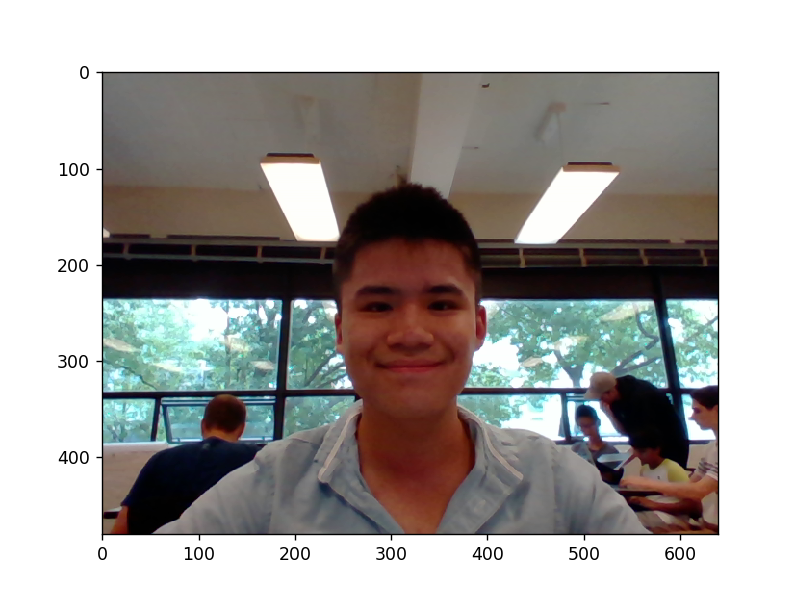

In [130]:
fig,ax = plt.subplots()
pic = take_picture()
ax.imshow(pic)
#takes a photo

In [131]:
# run this cell to download the models from dlib
from dlib_models import download_model, download_predictor, load_dlib_models
download_model()
download_predictor()
from dlib_models import models

File already exists:
	c:\users\jhan6\dlibmodels\dlib_models\dlib_face_recognition_resnet_model_v1.dat
File already exists:
	c:\users\jhan6\dlibmodels\dlib_models\shape_predictor_68_face_landmarks.dat


[rectangle(244,194,394,344)]


<IPython.core.display.Javascript object>


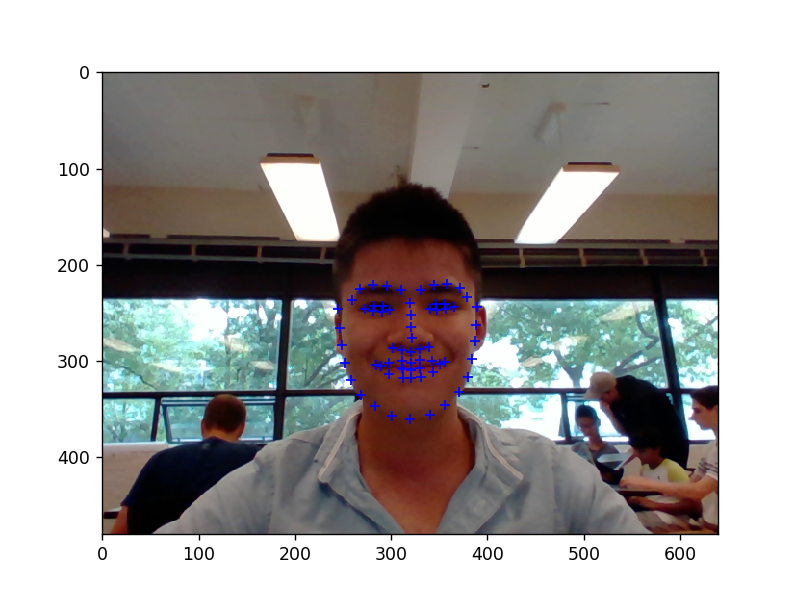

Number of faces detected: 1


<IPython.core.display.Javascript object>


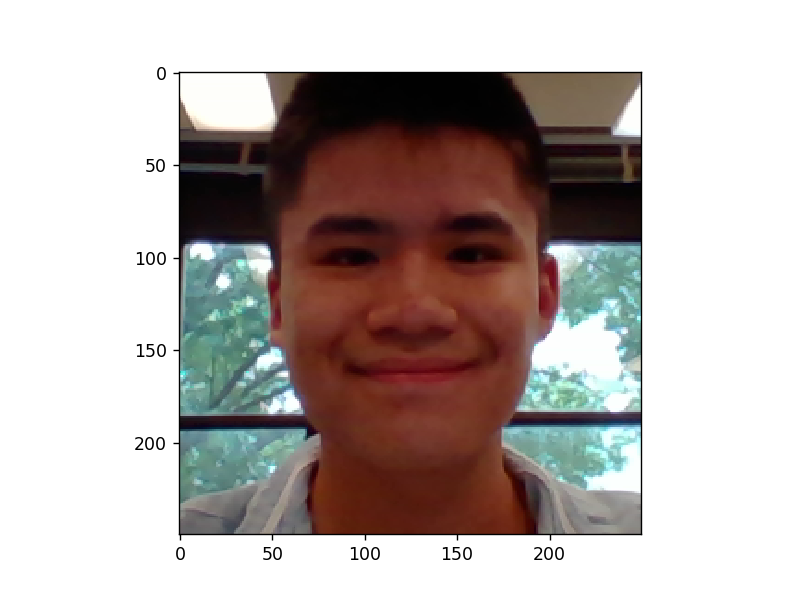

150


In [132]:
# first, we load the models that dlib has to detect faces.
load_dlib_models()
face_detect = models["face detect"]
face_rec_model = models["face rec"]
shape_predictor = models["shape predict"]
detections = list(face_detect(pic))
#print (face_detect(pic))
print(detections)
from matplotlib.patches import Rectangle
fig,ax = plt.subplots()
ax.imshow(pic)


print("Number of faces detected: {}".format(len(detections)))
for k, d in enumerate(detections):
    # Get the landmarks/parts for the face in box d.
    shape = shape_predictor(pic, d)
    # Draw the face landmarks on the screen.""
    for i in range(68):
        ax.plot(shape.part(i).x,shape.part(i).y,'+',color="blue")
#shows the face that an already trained neural network, dlib, finds

detect = list(detections)
for i in detect:
    fig,ax = plt.subplots()
    width = np.abs(i.left() - i.right())
    bottom = i.bottom() + 50
    top = i.top() -50 # height = top - bottom # top += height*0.3
    left = i.left()
    right = i.right()
    print (width)
    top = bottom-width -100
    if top <= 0:
        top = 0
    faceArray = (pic[top:bottom,left-50:left + width+50]) 
    ax.imshow(pic[top:bottom,left-50:left + width+50]) 
#gets the headshot += a little bit of the person    
x,y,z=faceArray.shape ## where z is the RGB dimension
### Method block begin
blackWhite = np.copy(faceArray)
blackWhite[:] = faceArray.mean(axis=-1,keepdims=1) 
blackWhite = (blackWhite[:,:,0])
#grayscales the image

In [124]:
def filterer(array):
    input_width = np.shape(array)[0]
    input_length = np.shape(array)[1]
    print (np.shape(array))
    filt_width = input_width // 48
    filt_length = input_length//48
    filtered = np.zeros((48,48))
    for rows in range (48):
        for col in range (48):
            num = np.mean(array[rows*filt_width:(rows+1)*filt_width,col*filt_length:(col+1)*filt_width])
            filtered[rows,col] = num
    return filtered
#code that turns numpy array into 48x48 pixels

In [133]:
filtered_black_white = filterer(blackWhite)
#changes the resolution to 48x48

(250, 250)


(48, 48)


<IPython.core.display.Javascript object>


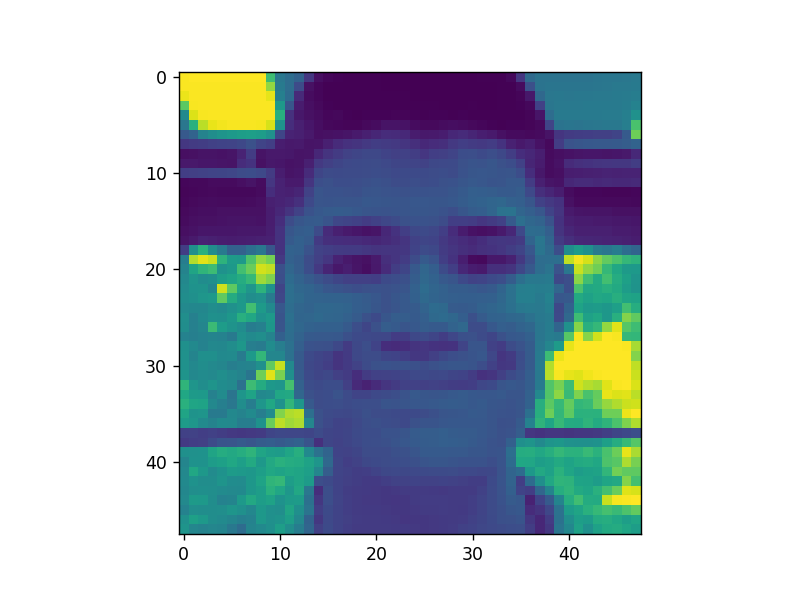

In [134]:
print (np.shape(filtered_black_white))
fig,ax = plt.subplots()
ax.imshow(filtered_black_white)
#draw the grayscaled lower res image

In [135]:
print (np.shape(filtered_black_white))

(48, 48)


In [136]:
filtered_black_white = (filtered_black_white.flatten() - mean)/std
#normalize data

In [137]:
filtered_black_white = np.reshape(filtered_black_white,(1,1,48,48))
print (np.shape(filtered_black_white))
output = model(filtered_black_white)
print (output)
orders = np.argsort(output)
print (orders)
dictionary = {0: "Angry", 1:"Disgust", 2 : "Fear", 3 : "Happy", 4:"Sad",5:"Surprise",6:"Neutral"}
print (dictionary[orders[0][6]])
print (dictionary[orders[0][5]])
#gives the face
#:0 = angry, 1 = Digust, 2 = Fear, 3 = Happy, 4 = Sad, 5 = Surprise, 6 = Neutral

(1, 1, 48, 48)
Tensor([[-0.23798391, -1.4887401 , -0.00894281,  0.62392524,  0.45551223,
         -1.32610184,  0.79293866]])
[[1 5 0 2 4 3 6]]
Neutral
Happy
